In [14]:
from Beam_trace import *
def defaultplot(ls,zoom):
    plt.figure(figsize=(15,10))
    ls.plot()
    ls.calculate_marginal()
    CLC=ls.circle_of_least_confusion()
    print(CLC)
    offset=0.09*0
    bb=beam_field()        
    bb.rectangular_grid(1,250,ls.entrance_pupil,0.002*0)
    bb.propagate(ls.surfaces)
    bb.plot(color='black')
    ls.calculate_marginal()
    ls.marginal_ray.plot(color='red',lw=1)
    if zoom >0:
        plt.xlim(CLC[0]-5*zoom,CLC[0]+5*zoom)
        plt.ylim(-1*zoom+offset,1*zoom+offset)
    #plt.xlim(112.9,113.1)
    #plt.ylim(10,25)
    plt.show()
    print(ls.entrance_pupil)


In [56]:
def add_achromat(s,f,DISZ):
    """Add Thorlabs achromat f=focal length (needs to be one of the available)
        s=lens system, DISZ = distance after lens
    """
    if f==250:
        #f=250 achromat
        s.add_surface(surface(7.5, 7.294478080093399900E-003   ,1.5139))
        s.add_surface(surface(2, -8.953353030709999500E-003   ,1.6411))
        s.add_surface(surface(DISZ, -2.177700348432099900E-003  ,1))
    elif f==200:
       #f=200 achromat
        s.add_surface(surface(8.5,  9.102494083378799600E-003    ,1.5139))
        s.add_surface(surface(2,  -1.073998496402110000E-002  ,1.6411))
        s.add_surface(surface(DISZ,  -2.657807308970099800E-003  ,1))
    elif f==150:    
        #f=150 achromat
        s.add_surface(surface(12,1.202212070209180000E-2 ,1.514))
        s.add_surface(surface(3,-1.386577925679420000E-002 ,1.6656))
        s.add_surface(surface(DISZ,-4.037141703673800000E-003 ,1))
    elif f==100:    
        #f=100 achromat
        s.add_surface(surface(16, 1.406074240719910000E-002  ,1.665))
        s.add_surface(surface(4,-2.263980076975320000E-002  ,1.7196))
        s.add_surface(surface(DISZ, -2.754062241806699900E-003  ,1))
    elif f==80:
    #f=75 achromat
        s.add_surface(surface(16,1.821493624772310000E-002,1.665))
        s.add_surface(surface(2,-2.155172413793100100E-002,1.7945))
        s.add_surface(surface(DISZ,-4.045307443365699800E-003,1))

    elif f==75:
    #f=75 achromat
        s.add_surface(surface(20,0.0196850393700787,1.66))
        s.add_surface(surface(3,-0.0239865675221876,1.7258))
        s.add_surface(surface(DISZ,-0.0040371417036738,1))

def add_lens(s,C1,C2,d=10,DISZ=10):
        s.add_surface(surface(10,C1,1.514))
        s.add_surface(surface(DISZ,C2,1))
def add_monospheric(s,f,DISZ,reverse=False):
    tlm=thorlabs_lens_monospheric
    if reverse:
        s.add_surface(surface(tlm[f][0],0,1.514))
        s.add_surface(surface(DISZ,-tlm[f][1],1))
    else:
        s.add_surface(surface(tlm[f][0],tlm[f][1],1.514))
        s.add_surface(surface(DISZ,0,1))
def add_meniscus(s,f,DISZ,reverse=False):
    tlm=thorlabs_meniscus
    if reverse:
        s.add_surface(surface(tlm[f][0],tlm[f][2],1.514))
        s.add_surface(surface(DISZ,-tlm[f][1],1))
    else:
        s.add_surface(surface(tlm[f][0],tlm[f][1],1.514))
        s.add_surface(surface(DISZ,tlm[f][2],1))

thorlabs_lens_monospheric={
    -150:[4.0,-1.295504599041330000E-002],
    -100:[4.0,-1.943256898561989900E-002],
    -75:[3.5, -2.591344908007259900E-002],
    60:[16.29, 3.236245954692559800E-002],
    75:[12.52, 2.588661661920790100E-002],
    100:[9.69, 1.941747572815530000E-002],
    125:[8.22, 1.553277415346380000E-002],
    150:[7.29, 1.294330830960390000E-002],
    175:[6.65, 1.109508487739930100E-002],
    200:[6.18, 9.707795359673799400E-003],
    250:[5.52, 7.765783955890300100E-003],
    300:[5.1,  6.471654154801999600E-003],
    400:[4.57, 4.853662088045399900E-003],
    500:[4.25, 3.882891977945199900E-003],
    750:[3.83, 2.588594651963400000E-003],
    1000:[3.62,1.941445988972600000E-003] 
}        
   
thorlabs_meniscus={
    100:[9.7,  3.295978905735000300E-002, 1.519756838905780000E-002],
    150:[7.29, 2.088991017338629900E-002, 8.380824673147799900E-003],
    200:[6.18, 1.534683855125840000E-002, 5.827505827505800200E-003],
    250:[5.53, 1.211533801793070000E-002, 4.450972537499400100E-003],
    300:[5.1,  9.992006394884100600E-003, 3.582688449412400200E-003]
}    
        
        

In [8]:
dd={2:4,-7:3}
dd[-7]

3

80.18
(149.88844473534849, 0.13249212566417867)


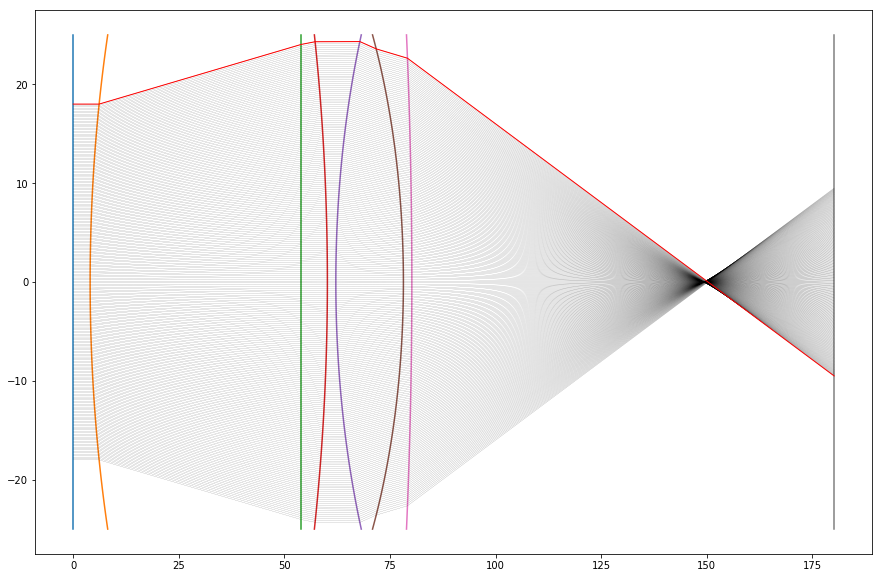

18
[ 0.          0.02383047 -0.00603289  0.00144185 -0.06459172  0.07316666
 -0.01498528 -0.        ]
[ -0.          -5.67233341   0.5039168    1.44414388  11.24385461
 -26.37362693  16.54027174   0.        ] -2.31377330964
80.18


In [77]:
if True:
    s=lens_system(18)
    s.surfaces=[]

     #convex f=300
    #s.add_surface(surface(11.8,1/150.,1.514))
    #s.add_surface(surface(40,-1/150.,1))
    #add_achromat(s,200,1)
    #add_meniscus(s,150,100)
    add_monospheric(s,-150,50,True)
    #add_monospheric(s,400,2)
    add_monospheric(s,200,2,True)
    add_achromat(s,80,100)
    #add_meniscus(s,200,100)
     #add_monospheric(s,250,2)
    #add_monospheric(s,150,100)
    #add_achromat(s,150,300)
    s.add_surface(surface(40,0,1))
   
print(s.surfaces[-2].pos())
defaultplot(s,0)
print(s.OSC(-0.0874887))
print(s.LA_contribution(),sum(s.LA_contribution()))
print(s.surfaces[-2].pos())